## Uppgift 1 (3p)
Förklara vad den här koden gör och vad som ritas ut:
```py
import matplotlib.pyplot as plt

x = list(range(10)) 
y = [i**2 for i in x]
fig, ax = plt.figure(), plt.axes()
ax.plot(x,y)
ax.set(title="Plot", xlabel="x", ylabel="y")
```
Skriv en kort kommentar för varje rad.

[Text(0.5, 1.0, 'Plot'), Text(0.5, 0, 'x'), Text(0, 0.5, 'y')]

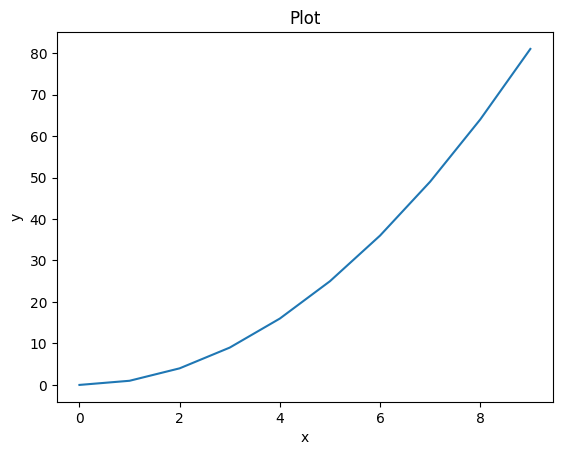

In [20]:
import matplotlib.pyplot as plt                 # Importerar matplotlib.pyplot modulen med namn plt

x = list(range(10))                             #skapar en lista med siffror 0-9
y = [i**2 for i in x]                           # höjer upp varje index i x till 2. så 0**2, 1**2, 2**2, ..., 9**2
fig, ax = plt.figure(), plt.axes()              # Skapar variabler med funktioner ifrån Matplotlib.pyplot som vi döpt till plt
ax.plot(x,y)                                    # Tar värdena i våran x lista och y lista och plottar.
ax.set(title="Plot", xlabel="x", ylabel="y")    # sätter namn och vädern i våran graf


## Uppgift 2 (3p)
Simulera 1000000 tärningskast och beräkna antalet ettor, tvåor, treor, fyror, femmor och sexor. Spara
resultatet i en lämplig datastruktur.

In [21]:
import random as rnd

rolls = [rnd.randint(1,6) for i in range(1000000)]
dice_rolls = dict(
roll1 = rolls.count(1),
roll2 = rolls.count(2),
roll3 = rolls.count(3),
roll4 = rolls.count(4),
roll5 = rolls.count(5),
roll6 = rolls.count(6)
)

print(dice_rolls)

{'roll1': 166727, 'roll2': 166886, 'roll3': 165731, 'roll4': 167021, 'roll5': 167151, 'roll6': 166484}


 ## Uppgift 3 (3p)
Skriv en funktion som tar in en radie som inparameter och som returnerar volymen av en sfär. Volymen för en
sfär är:
$$V_{sphere} = \frac{4}{3}\pi r^3$$
Låt användaren mata in ett tal och kör funktionen. Tänk på att ta med lämplig felhantering.

In [3]:

from __future__ import annotations
from math import pi
from typing import Type

def calc_sphere_volume(radius: (int | float)):
	"""calculates volume of sphere of a given radius"""
	if not isinstance(radius, (int, float)):
		raise TypeError(f"Radius must be int or float, not {type(radius).__name__}") #.__name__ returns changes <class str> to str.
	if radius <= 0:
		raise ValueError(f"Radius must be a positive value, not {radius}")
	return print((4*pi*(radius**3))/3)

#calc_sphere_volume(float(input("Enter radius of sphere to calculate its volume: ")))

while True:
	user_input = input("Enter radius to calculate the volume")
	try:
		user_input = float(user_input)
		calc_sphere_volume(user_input)
		break
	except TypeError as err:
		print(err)
	except ValueError as err:
		print(err)

4.1887902047863905


## Uppgift 4 (3p)
Läs in en textfil som heter bamba.txt och innehåller:
```
v42
Chili sin carne 
Pannkakor
Ärtsoppa
Kebab
Vegetarisk lasagne
```
Läs in texterna och skriv ut dem i terminalen

In [6]:

file_path = "bamba.txt"
week = ["mån", "tis", "ons","tors","fre","lör"]
count = 0


with open(file_path, "r") as read_file:
	for lines in read_file:
		print(f"{lines} + {week[count]}")
		count += 1


v42
 + mån
Chili sin carne 
 + tis
Pannkakor
 + ons
Ã„rtsoppa
 + tors
Kebab
 + fre
Vegetarisk lasagne + lör


In [4]:
with open ("bamba.txt", "r") as f:
    lines = f.readlines()
    
weekdays = ["","mån", "tis", "ons", "tors", "fre"]
both = [weekdays, lines]

for i in zip(*both):
    print(*i, end="")

 v42
mån Chili sin carne 
tis Pannkakor
ons Ã„rtsoppa
tors Kebab
fre Vegetarisk lasagne

## Uppgift 5 (3p)
Skapa en funktion som tar in två punkter i 2D , och som returnerar tillbaka avståndet mellan
dessa. Anropa därefter denna funktion för test
Det finns en textfil som heter testpunkter.txt som ligger i undermappen testpoints och innehåller:
```
Punkt 1, punkt 2 
(1,2), (0,0)
(2,0), (3,5)
...
(-2,-2), (9,2)
```

In [43]:

with open ("testpunkter.txt", "r") as f_read: # should be with open("testpoints/testpunkter.txt", "r")
	lines = f_read.readlines()
	lines.pop(0)
	
	lines_clean = []
	for line in lines:
		line = line.replace("()\n ") #removes unnecesery symbols.
	
		lines_clean.append(line)
		
	lines_split = []
	for line in lines_clean:
		lines_split.append(line.split(",")) # "1,2,0,0" -> ["1", "2", "0", "0"}
	
	lines_float = []
	for line in lines_split:
		for index in line:
			lines_float.append(float(index)) # converts to float.

print(lines_float)

[1.0, 2.0, 0.0, 0.0, 2.0, 0.0, 3.0, 5.0]


In [6]:
f = "(1,2), (0,0) (2,0), (3,5)" #Does not work. Why?
for row in f:
	tmp = [float(i.strip("(,) \n")) for i in row.split(",")] 

ValueError: could not convert string to float: ''

In [2]:
with open("testpunkter.txt", "r") as f_read:
    s = [
        [
            float(character.strip("() \n"))
            for character in row.split(",")
            if character.strip("() \n") != ""
        ]
        for index, row in enumerate(f_read)
        if index > 0
    ]
s  # -> [[1.0, 2.0, 0.0, 0.0], [2.0, 0.0, 3.0, 5.0], [-2.0, -2.0, 9.0, 2.0]]


[[1.0, 2.0, 0.0, 0.0], [2.0, 0.0, 3.0, 5.0]]

In [23]:
# Get into folder testpoints
# read testpunkter.txt
# clean testpunkter.txt
# from math import sqrt
# create function that calculates

In [17]:
# Andreas MVG ++ Solution:

from math import dist

def calc_dist(p, q) -> float:
    return dist(p, q)

file_path = "testpunkter.txt"
with open(file_path, "r") as f:
    clean = list()
    for row in f.readlines()[1:]:
        temp = [float(i.strip("() \n")) for i in row.split(",")]
        clean.append(temp)

for points in clean:
    p = (points[0], points[1])
    q = (points[2], points[3])
    print(calc_dist(p, q))

# with open("testpunkter.txt","r") as f_read:
# 	for row in f_read.readlines()[1:]:
# 		points = [float(i.strip("(,) \n")) for i in row]

#     print(points)

2.23606797749979
5.099019513592785
5.8309518948453
8.246211251235321
11.704699910719626


## Uppgift 6 (4p)
I den här uppgiften ska du skapa ett blackjack som är ett kortspel. Förenklat är reglerna för blackjack:

- dealern tar två kort
- dealern visar sitt första kort
- spelaren tar två kort
- spelaren får välja att ta nytt kort eller stanna
- när spelaren stannar räknar man poängen genom:

- - J, K, Q värda 10p
- - A värd 1 eller 11
- - Övriga kort värda deras valör

- om spelarens poäng mindre eller lika med 21, vinner spelaren om hens poäng överstiger dealerns,
annars vinner dealern

In [22]:
import random as rnd


# Card Variable List

# Player

# Player pick card

# Dealer

# Show card.

# Calculate score.

# Winner

# Dicitonary for all cards and their value
card_values = {
    "J": 10,
    "K": 10,
    "Q": 10,
    "a": 1,
    "A": 11,
    "1": 1,
    "2": 2,
    "3": 3,
    "4": 4,
    "5": 5,
    "6": 6,
    "7": 7,
    "8": 8,
    "9": 9,
    "10": 10,
}
deck = []
for i in range(4):
    for key, value in card_values.items():
        deck.append(key) 

print(deck)

['J', 'K', 'Q', 'a', 'A', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'K', 'Q', 'a', 'A', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'K', 'Q', 'a', 'A', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'K', 'Q', 'a', 'A', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']


In [26]:
import random as rnd

def pull_card(deck: list) -> str:
	"""pulls random card from deck"""
	index = rnd.randint(0, len(deck)-1)
	card = deck[index]
	deck.pop(index)
	return card

def get_hand_value(hand: list) -> int:
	"""calculates combined value of cards in hand"""
	sum_cards = 0
	for key, value in card_value.items():
		for item in hand:
			if item == key:
				sum_cards += value
	# converting aces from 11 to 1 in value if value of hand is too large
	if sum_cards > 21 and "A" in hand:
		for i in (range(hand.count("A"))):
			sum_cards -= 10
			if sum_cards <= 21:
				break
	return sum_cards

# create dictionary of symbols paired with their value
card_value = {
"A": 11,
"J": 10,
"K": 10,
"Q": 10,
"2": 2,
"3": 3,
"4": 4,
"5": 5,
"6": 6,
"7": 7,
"8": 8,
"9": 9,
"10": 10,
}

def play():
# create a deck list of (decks) decks containing all 52 cards from each deck


    deck = []
    decks = 1
    for i in range(4 * decks):
        for key, value in card_value.items():
            deck.append(key)

    
	# initialize lists to hold the cards of players and dealers hand
    my_hand = []
    dealers_hand = []
	
	# dealer draws 2 cards
    for i in range(2):
        dealers_hand.append(pull_card(deck))
	
	# dealer shows first card drawn
    print(dealers_hand[0])

	# player draws 2 cards
    for i in range(2):
        my_hand.append(pull_card(deck))
	
	# show players hand
    print(my_hand, get_hand_value(my_hand))
	
	# player choses to pull more cards or stop
    while True:
        choice = input("\"H\" for hit, \"S\" for stay").upper()
        if choice == "H":
            my_hand.append(pull_card(deck))
            print(my_hand, get_hand_value(my_hand))
            if get_hand_value(my_hand) > 21:
                break
        elif choice == "S":
            break
        else:
            print(f"Make sure to input \"H\" or \"S\", {choice} not accepted")
	
	# print string based on who wins
    if get_hand_value(my_hand) <= 21 and get_hand_value(my_hand) > get_hand_value(dealers_hand):
        print(f"Player wins\nPlayer hand: {my_hand}, {get_hand_value(my_hand)}\nDealers hand: {dealers_hand}, {get_hand_value(dealers_hand)}")
    else:
        print(f"Dealer wins\nPlayer hand: {my_hand}, {get_hand_value(my_hand)}\nDealers hand: {dealers_hand}, {get_hand_value(dealers_hand)}")

play()

8
['A', '8'] 19
Player wins
Player hand: ['A', '8'], 19
Dealers hand: ['8', '2'], 10


In [ ]:
# returns count of unique values in array
import numpy as np

np.unique(np.randint(),)



## Uppgift 7 (4p)
- Skapa en klass som heter NormalDist som följer detta UML:
- vid addition av två objekt av typen NormalDist ska dess respektive mu och sigma adderas.
- formeln för pdf för normaldistribution:

In [30]:
# mu är u-liknande symbolen
# sigma ser ut som ett snett q

from __future__ import annotations

from math import sqrt, pi, e
import numpy as np
import matplotlib.pyplot as plt

class NormalDist:
    def __init__(self, mu: float = 0, sigma: float = 1):
        self._mu = mu
        self._sigma = sigma
		
    def pdf(self, x: float) -> float: # probability density function
        return (1/(self._sigma*sqrt(2*pi)))*e**(-(1/2)*((x - self._mu) / self._sigma)**2)
		
    def plot_pdf(self, x: float, y: float): # TODO type hint check.
        interval = np.linspace(x, y)
        plt.plot(interval, self.pdf(interval))
		
    def __add__(self, other: NormalDist) -> NormalDist:
        return NormalDist(self._mu + other._mu, self._sigma + other._sigma)
		
    def __repr__(self) -> str:
	    return f"NormalDist(mu = {self._mu}, sigma = {self._sigma}"

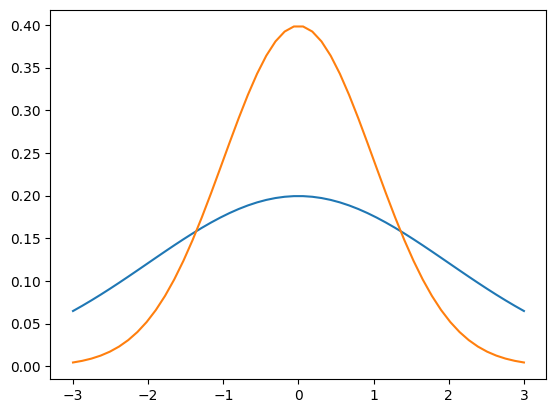

In [31]:
a = NormalDist()
b = NormalDist()
c = a+b
c.plot_pdf(-3,3)
a.plot_pdf(-3,3)